# Employee Turnover: Analyzing Exit Surveys

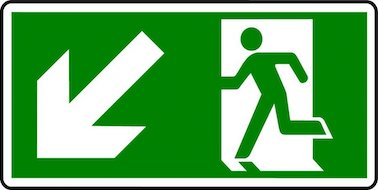

## Introduction

Skilled employees can be regarded as valuable assets in the knowledge economy. High turnover in the companies is [often correlated to low performance](https://hbr.org/2016/04/making-exit-interviews-count). If people are leaving an organization in ever-increasing numbers, figuring out why is crucial.
Gathering feedback from departing employees not only helps adjust HR policies but can also promote engagement by signaling that their [views matter and turn them into corporate ambassadors for years to come.](https://hbr.org/2016/04/making-exit-interviews-count)

For that project I'll work with **exit surveys** from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

For that project I will answer following questions that could be a good starting point to HR department to analyse departing employees feedback:

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Key findings

The main conclusion of that research is that more experienced employees with older age resign more often because of dissatisfaction.

### Data sets

 - Technical and Further Education (TAFE) institute survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) 
 - Department of Education, Training and Employment survey was downloaded [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Authors of the challenge made changed the encoding of the files to UTF-8 (the original ones are encoded using cp1252.)
 
 
 # Data cleaning and preparation
 
 Main focus in that project will be made at data cleaning, data aggregation and combining two datasets to a single dataframe.
 
 ## Data Exploration
 
 I should find fields with following information to answer the questions:
 
 - how long does employee work there (end date - start date)
 - type of resignation (leave only voluntary resignation)
 - age of employee
 - reasons for resignation (grouped by categories)
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

 ### Exploring key columns at DETE survey
 
 Let's have a look at the *Department of Education, Training and Employment* data set (`dete_survey`).

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

`Dete_survey` data set includes 822 rows and 56 columns, some of the columns include null values.

Core columns which are interesting for us in regard to age and position of employees are:
 - `ID` that is a unique key, similar to numeric index
 - `SeparationType` - to identify main groups and narrow down the search
 - `Cease Date` - `DETE Start Date` how long did employees work there
 - `Gender` and `Age` will help to profile better certain groups of employees
 - `Position` and `Employment Status` also will differentiate full-time and part-time as well junior from senior positions
 
There are a number of columns with booleans that were probably ticked as contributing factors of resignation by employees: from column 10 to column 27.
Columns 28-48 seem to present evaluations of working conditions and relationships. Let's take a look at that data:

In [3]:
dete_survey.iloc[:5,28:49]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M


Columns 28-48 are filled with some cryptic strings. Since I don't have any exploratory data on them I continue without these columns.

Next step is to take a closer look at the columns that are important for my analysis. I identify how much the values vary there.

In [4]:
print(dete_survey['SeparationType'].value_counts())

# create a list with separation types
dete_sep_types = dete_survey['SeparationType'].value_counts().index.tolist()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


In [5]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [6]:
dete_survey['Gender'].value_counts()

Female    573
Male      225
Name: Gender, dtype: int64

In [7]:
dete_survey['DETE Start Date'].value_counts().head()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
Name: DETE Start Date, dtype: int64

In [8]:
dete_survey['DETE Start Date'].value_counts().tail()

1963    4
1968    3
1967    2
1965    1
1966    1
Name: DETE Start Date, dtype: int64

In [9]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
08/2012         2
04/2014         2
04/2013         2
07/2014         2
09/2014         1
11/2012         1
07/2012         1
09/2010         1
2010            1
2014            1
07/2006         1
Name: Cease Date, dtype: int64

### Next steps for DETE survey

**Core columns** for my analysis `DETE Start Date` and `Cease Date`:
 - are formatted as strings, need to be numeric
 - include 73 and 34 values 'Not Stated' respectively, need to turn to NaN
 - `Cease Date` includes dates in month/year, should leave only years
 - last step is to subtract `DETE Start Date` from `Cease Date` and to format them as bins as in tafe_survey['Years of work_total'] and ['Years of work_current]
 
**Other columns** also need some attention:
 - leave only resignations (`'Separation Type'` is Resignation or Other)
 - deal with NaN values in the columns `Age` and `Gender`
 - delete all columns that won't be used in my analysis
 
 ### Exploring key columns at TAFE survey

Let's explore the second data set from *Technical and Further Education institute* (`tafe_survey`).

In [10]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [11]:
tafe_survey.iloc[:, 5:16].head()

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,-,-,-,-,-,-,-,-,Travel,-
2,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,Travel,-
4,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-


`Tafe_survey` data set includes 702 rows and 72 columns. There are a number of null values in the dataframe.

Key columns which are interesting for us in regard to age and position of employers are:

 - `Record ID` that is a unique key, similar to numeric index
 - `Reason for ceasing employment` - to identify main groups and narrow down the search
 - `LengthofServiceOverall. Overall Length of Service at Institute (in years)` how long did employee work there in total
 - `LengthofServiceCurrent. Length of Service at current workplace (in years)` how long did employee work at the current role
 - `Gender. What is your Gender?` and `CurrentAge. Current Age` will help to profile better certain groups of employers
 - `Classification. Classification` and `Employment Type. Employment Type` also will differentiate full-time and part-time as well junior from senior positions
 
There are a number of columns with strings that were ticked as contributing factors of resignation by employers: from column 5 to column 16.

### Rename key columns at TAFE survey

Since the names of the columns in `tafe_survey` are too long to adequately work with, I rename them.


In [12]:
tafe_survey.rename(columns = {'Record ID': 'ID',
                              'Reason for ceasing employment': 'Separation Type',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'Years of work_total',
                              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'Years of work_current',
                              'CurrentAge. Current Age':'Age',
                             'Gender. What is your Gender?': 'Gender',
                             'Classification. Classification': 'Position',
                             'Employment Type. Employment Type': 'Employment Status'}, inplace=True)

My next step is to explore selected columns in `tafe_survey` and see how much null values they include and how do their values vary.

In [13]:
print(tafe_survey['Separation Type'].value_counts())

# create a list with separation types
tafe_sep_types = tafe_survey['Separation Type'].value_counts().index.tolist()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Separation Type, dtype: int64


In [14]:
tafe_survey['Age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: Age, dtype: int64

In [15]:
print(tafe_survey['Years of work_total'].value_counts())

# create a list to format same dete_survey column
years_total = tafe_survey['Years of work_total'].value_counts().index.tolist()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: Years of work_total, dtype: int64


In [16]:
tafe_survey['Years of work_current'].value_counts()

# create a list to format same dete_survey column
years_current = tafe_survey['Years of work_current'].value_counts().index.tolist()

### Next steps for TAFE survey

Core columns for my analysis are `Years of work` and `Age`:
 - formatted as strings, I need to reformat them to numerics will mean loss of information, so I will use them as bins
 - bins should be consistent with dete_survey to enable work on both datasets
 
 Other columns also need some attention:
 - leave only resignations (`'Separation Type'` is 'Resignation')
 - deal with NaN values in the columns `Age` and `Gender`
 - turn all contributing factor columns to booleans and check their consistency with  DETE survey
 - delete all columns that won't be used in my analysis
 
 ## Data cleaning and formatting

Surveys have the same structure and contain all the necessary information. I clean both dataframes and merge them into one.
At first I delete the columns I will not use in my analysis from both dataframes.

In [17]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
dete_survey.rename(columns = {'SeparationType':'Separation Type'}, inplace=True)

In [18]:
# delete columns that won't be used in analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated = dete_survey_updated.drop(dete_survey_updated.columns[[5, 7, 8, 10, 11, 30, 31, 32, 33, 34]], axis=1)

In [19]:
# delete columns that won't be used in analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated = tafe_survey_updated.drop(tafe_survey_updated.columns[[1, 2, 3, 5, 6, 7]], axis=1)

Further step is to rename columns with contributing factors. I make them lowercase separated with `_`.

In [20]:
# rename columns with contributing factors
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace('\s+', '_', regex=True)

# check the result
dete_survey_updated.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,classification,employment_status,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,A01-A04,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,AO5-AO7,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,NaN,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Primary,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,NaN,Permanent Full-time,False,False,False,...,False,False,False,False,False,True,False,False,Female,61 or older


In [21]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace(
                                                                      'Contributing Factors. ', '', regex=False
                                                                      ).str.lower().str.replace(
                                                                                                '\s+', '_', regex=True
                                                                                                ).str.strip()

# check the result
tafe_survey_updated.head()

,id,separation_type,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,none,gender,age,employment_status,position,years_of_work_total,years_of_work_current
0,6.341330e+17,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Retirement,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Retirement,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Resignation,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Resignation,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


I'm only interested in employees who **resigned** so I leave only row with according `separation_type`.

In [22]:
# create dataframe with only resignations from dete_survey_updated
print(dete_sep_types)

dete_resigned = dete_survey_updated[dete_survey_updated['separation_type'].isin(dete_sep_types[1:4])].copy()

['Age Retirement', 'Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate', 'Voluntary Early Retirement (VER)', 'Ill Health Retirement', 'Other', 'Contract Expired', 'Termination']


In [23]:
# create dataframe with only resignations from tafe_survey_updated
print(tafe_sep_types)

tafe_resigned = tafe_survey_updated[tafe_survey_updated['separation_type'] == tafe_sep_types[0]].copy()

['Resignation', 'Contract Expired', 'Retrenchment/ Redundancy', 'Retirement', 'Transfer', 'Termination']


### Delete null values in DETE survey

In [24]:
print(dete_resigned.shape)

# how much null values in dataframe
dete_resigned.isnull().sum()

(311, 25)


id                                       0
separation_type                          0
cease_date                              11
dete_start_date                         28
role_start_date                         40
classification                         150
employment_status                        4
interpersonal_conflicts                  0
job_dissatisfaction                      0
dissatisfaction_with_the_department      0
physical_work_environment                0
lack_of_recognition                      0
lack_of_job_security                     0
work_location                            0
employment_conditions                    0
maternity/family                         0
relocation                               0
study/travel                             0
ill_health                               0
traumatic_incident                       0
work_life_balance                        0
workload                                 0
none_of_the_above                        0
gender     

There are null values in the columns that are important to calculate how long employees worked at the institutes. 
In one case they are more than 10% of the total rows (in `role_start_date`). But for them there is no way to refill or insert mean values. I delete rows with null values in `dete_start_date`, `cease_date` and `role_start_date`.

In [25]:
# delete null values
dete_resigned = dete_resigned.dropna(subset=['dete_start_date', 'cease_date', 'role_start_date'])

In [26]:
# drop row with incorrect data
dete_resigned = dete_resigned[dete_resigned['role_start_date'] != 200]
dete_resigned['role_start_date'].dtypes

dtype('float64')

### Format and aggregate columns to find years of work in DETE survey

Further I leave only years in the `cease_date` column and format all 3 columns to numeric to make calculations.
The result I store in new columns `years_of_work_total` and `years_of_work_current`.

In [27]:
# split and extract year in the column'Cease Date'
dete_resigned['cease_date'] = dete_resigned['cease_date'].str.split('/').str.get(-1)

In [28]:
# delete missing values in the column'Cease Date'
dete_resigned['cease_date'].value_counts(dropna=False)

2013    124
2012    113
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [29]:
# convert cease_date to integer
dete_resigned['cease_date'] = dete_resigned['cease_date'].astype('int32')

In [30]:
# convert dete_start_date to integer
dete_resigned['dete_start_date'] = dete_resigned['dete_start_date'].astype('int32')

Text(0.5, 0, 'Years')

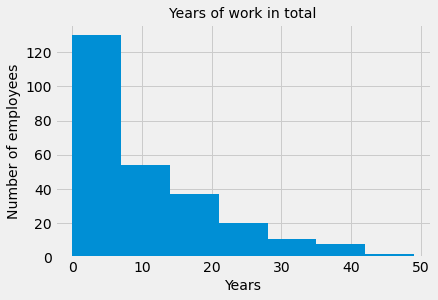

In [73]:
# create new column with calculation
dete_resigned['years_of_work_total'] = dete_resigned['cease_date'] - dete_resigned['dete_start_date']

# create a plot to check result
dete_resigned['years_of_work_total'].hist(bins=7)
plt.title('Years of work in total',fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
plt.xlabel('Years', fontsize=14)

Text(0.5, 0, 'Years')

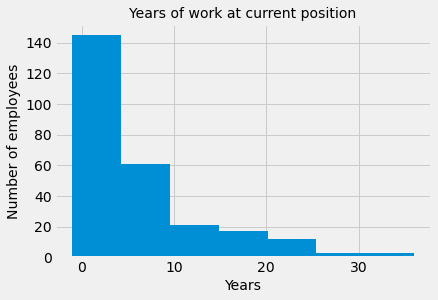

In [72]:
# create column with calculation
dete_resigned['years_of_work_current'] = dete_resigned['cease_date'] - dete_resigned['role_start_date']

# create a plot to check results
dete_resigned['years_of_work_current'].hist(bins=7)
plt.title('Years of work at current position', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
plt.xlabel('Years', fontsize=14)

For consistency I format data in `dete_survey` in the bins following the pattern from `tafe_survey` (cells 15 and 16).

In [33]:
# set the pattern
cut_labels = years_total
cut_bins = [0, 1, 2, 4, 6, 10, 20, 50]

# cut the data
dete_resigned['years_of_work_total'] = pd.cut(dete_resigned['years_of_work_total'], bins=cut_bins, labels=cut_labels)

In [34]:
# check result
dete_resigned['years_of_work_total'].value_counts()

5-6                   52
7-10                  41
More than 20 years    39
11-20                 38
3-4                   36
Less than 1 year      22
1-2                   14
Name: years_of_work_total, dtype: int64

In [35]:
# set the pattern
cut_labels = years_current
cut_bins = [0, 1, 2, 4, 6, 10, 20, 50]

# cut the data
dete_resigned['years_of_work_current'] = pd.cut(dete_resigned['years_of_work_current'], bins=cut_bins, labels=cut_labels)

In [36]:
# check result
dete_resigned['years_of_work_current'].value_counts()

3-4                   45
Less than 1 year      38
11-20                 35
7-10                  33
More than 20 years    31
1-2                   27
5-6                   18
Name: years_of_work_current, dtype: int64

In [37]:
# delete columns with initial data
dete_resigned.drop(['cease_date', 'dete_start_date', 'role_start_date'], axis=1)

,id,separation_type,classification,employment_status,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,...,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,years_of_work_total,years_of_work_current
3,4,Resignation-Other reasons,Primary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,36-40,More than 20 years,11-20
5,6,Resignation-Other reasons,NaN,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,41-45,5-6,7-10
8,9,Resignation-Other reasons,Secondary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,31-35,3-4,3-4
9,10,Resignation-Other employer,NaN,Permanent Part-time,True,True,True,False,False,False,...,False,False,False,False,False,False,Female,46-50,5-6,3-4
11,12,Resignation-Move overseas/interstate,Secondary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Male,31-35,3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,809,Resignation-Other reasons,Primary,Permanent Full-time,False,False,True,False,False,False,...,False,False,False,True,False,False,Female,36-40,More than 20 years,More than 20 years
808,810,Resignation-Other reasons,NaN,Permanent Part-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,26-30,3-4,3-4
815,817,Resignation-Other employer,Primary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Male,21-25,1-2,1-2
816,818,Resignation-Move overseas/interstate,Secondary,Permanent Full-time,False,False,False,False,False,False,...,True,False,False,False,False,False,Female,21-25,1-2,1-2


### Format contributing factor columns to booleans in TAFE survey

To find out more about employees that were dissatisfied with I choose 3 contributing factors from `tafe_resigned`:
 - `dissatisfaction`
 - `job_dissatisfaction`
 - `interpersonal_conflict`.
 
 
I convert the data in these columns to boolean format. Then I create a new aggregated column `dissatisfied`.
If any column in `tafe_resigned` (the columns named above) has *True* value - the row in a new column will be *True* also. If all values are *False*, then resignation was not caused by dissatisfaction and it gets the value *False*. NaN values will remain unchanged.

In [38]:
# create function
def bool_vals(row):
    if pd.isnull(row):
        return np.nan  # format to NaN values
    elif row == '-':
        return False
    else:
        return True

In [39]:
angry_cols = ['dissatisfaction', 'job_dissatisfaction']

# apply function to all 3 columns
for col in angry_cols:
    tafe_resigned[col] = tafe_resigned[col].apply(bool_vals)

In [40]:
# new aggregating column
tafe_resigned['dissatisfied'] = tafe_resigned[angry_cols].any(axis='columns', skipna=False)

# check result
tafe_resigned['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

There are 8 null values, I suppose that they can be treated like `False`.

In [41]:
tafe_resigned['dissatisfied'].fillna(False, inplace=True)

In DETE survey there are three columns for dissatisfaction:
 - `interpersonal_conflicts`
 - `job_dissatisfaction`
 - `dissatisfaction_with_the_department.`
 
They are already formatted in boolean values. I create a column `dissatisfied` to join results from them.

In [42]:
angry_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department']

# new aggregated column
dete_resigned['dissatisfied'] = dete_resigned[angry_cols].any(axis='columns', skipna=False)

# check result
dete_resigned['dissatisfied'].value_counts(dropna=False)

False    209
True      53
Name: dissatisfied, dtype: int64

### Prepare and merge dataframes

To preserve the information about the institute from which the survey originated I will create a new column `institute`. 
Then I concatenate dataframes and drop all the columns that include more than 500 NaN values since they will not be used in my analysis.

In [43]:
# make copies to avoid SettingWithCopy Warning
tafe_resigned_copy = tafe_resigned.copy()
dete_resigned_copy = dete_resigned.copy()

In [44]:
# create new columns
tafe_resigned_copy['institute'] = 'TAFE'
dete_resigned_copy['institute'] = 'DETE'

In [45]:
# concatenate dataframes
exit_survey = pd.concat([tafe_resigned_copy, dete_resigned_copy], ignore_index=True)

# delete unnecessary columns
exit_survey = exit_survey.dropna(thresh=500, axis=1).drop(exit_survey.columns[1:4], axis=1).drop('job_dissatisfaction', axis=1)

# check results
exit_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     602 non-null    float64
 1   gender                 547 non-null    object 
 2   age                    550 non-null    object 
 3   employment_status      552 non-null    object 
 4   years_of_work_total    532 non-null    object 
 5   years_of_work_current  517 non-null    object 
 6   dissatisfied           602 non-null    bool   
 7   institute              602 non-null    object 
dtypes: bool(1), float64(1), object(6)
memory usage: 33.6+ KB


The dataset is ready for analysis and includes all the necessary information to answer the questions that are stated in the beginning of the project.

# Who is more dissatisfied: newbies or experienced employees, young or older?

## Four key career stages 

Through the time that employees work for the company their attitudes, needs and preferences can vary. 

I follow the definition of four suggested [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) of four career stages:
 - **Newbie** (3 years or less at the company). These employees are least invested in company culture and the most transient. Their top motivator is learning new skills. Employees in the newbie stage are challenged by not meeting personal goals or expectations and prefer managers that will offer guidance and feedback.
 - **Sophomore** (4-7 years at the company). These employees are focused on proving themselves, and often prefer to feel challenged. They pay more attention to ethics, transparency and honest communications.
 - **Tenured** (8-10 years at the company). These employees are often motivated by public recognition and promotion and seek ownership over specific projects or teams. The biggest challenge for the tenured stage is combatting stagnation and feeling “stuck” and they prefer open communication about that with the management.
 - **Sage** (11 years or more at the company). They are the most loyal and engaged employees who are increasingly engaged with projects that build the organization’s future. 

I classify employees in these four groups to see if there is a difference in the reasons for them quitting the job.


In [46]:
# create new column with career stage
exit_survey['career_stage'] = exit_survey['years_of_work_total'].replace(['Less than 1 year', '1-2'], 'newbie').replace(
    ['3-4', '5-6'], 'sophomore').replace('7-10', 'tenured').replace(['11-20', 'More than 20 years'], 'sage')

## Three life stages of psychological development

After I set the parameters for different career stages it is time to classify employees to age groups. I follow terminology used in [developmental psychology](https://en.wikipedia.org/wiki/Developmental_psychology). 
This field of psychological science aims to explain how thinking, feeling, and behaviors change throughout life.

Below are described [three age groups](https://en.wikipedia.org/wiki/Developmental_psychology) relevant for data set:
 - **young adults** (18-29 years). This period of life is often marked by forming and maintaining relationships (bonds, close friendships, families).
 - **middle adults** (30–59 years). This stage of life tends to center on developing a sense of purpose and contributing to society. 
 - **old adults** (60 and older). At that age individuals assess the quality of their lives. In reflecting on their lives, people in this age group develop a feeling of integrity if deciding that their lives were successful or a feeling of despair if evaluation of one's life indicates a failure to achieve goals.
 
 First I check how age bins look like in the column `age`. 


In [47]:
exit_survey['age'].value_counts(dropna=False)

51-55            68
NaN              52
41  45           45
41-45            43
46  50           39
36-40            35
21  25           33
26  30           32
36  40           32
31  35           32
26-30            30
56 or older      29
31-35            29
46-50            28
21-25            26
56-60            22
61 or older      17
20 or younger    10
Name: age, dtype: int64

There is no data for 55 of the rows, so I will ignore them in my analysis.

But how can I classify these heterogeneous bins to three groups? Some of them include ages from different age groups. Unfortunately there is no way to make it rigorously.

I use following approximation:
 -  separate all ages for every row in the dataframe
 - store them at the same index for every row 
 - calculate mean value
 - use mean value to define age groups. 

In [48]:
# find all numbers for every row
pattern = r"(?P<ages>[2-6][0-6])"
ages = exit_survey['age'].str.extractall(pattern)

# store them with multiindex
ages.index = ages.index.get_level_values(0)

# check result
print(ages.head())

# convert to numeric
ages['ages'] = pd.to_numeric(ages['ages'], errors='coerce')

  ages
1   41
1   45
2   56
3   20
4   46


In [49]:
# calculate means
ages_means = pd.pivot_table(data=ages, values = 'ages', index=ages.index)

# check the result
ages_means.head()

,ages
1,43
2,56
3,20
4,48
5,38


In [50]:
# set the pattern
cut_labels = ['young adults', 'middle adults', 'old adults']
cut_bins = [0, 30, 60, 100]

# cut the data
exit_survey['age_group'] = pd.cut(ages_means['ages'], bins=cut_bins, labels=cut_labels, right=False)

# check result
exit_survey['age_group'].value_counts()

middle adults    402
young adults     131
old adults        17
Name: age_group, dtype: int64

## Visualizing dissatisfaction

In my opinion, it is a very good option to answer the questions about different dissatisfied groups to visually represent them. I will calculate percentages of dissatisfied employees for every career stage and age group and plot them.

In [51]:
# calculate percentages for every career stage
count_dissatisfied = pd.pivot_table(exit_survey, values=['dissatisfied'], index='career_stage')

# reorder labels and plot bar chart
stages_reorder = ['newbie', 'sophomore', 'tenured', 'sage']
count_dissatisfied = count_dissatisfied.reindex(stages_reorder)
print(count_dissatisfied)

              dissatisfied
career_stage              
newbie            0.208092
sophomore         0.228261
tenured           0.306452
sage              0.247788


In [52]:
# calculate percentages for every career stage
count_dissatisfied_age = pd.pivot_table(exit_survey, values=['dissatisfied'], index='age_group')


Text(-0.25, 3, 'Percentage of dissatisfied employees')

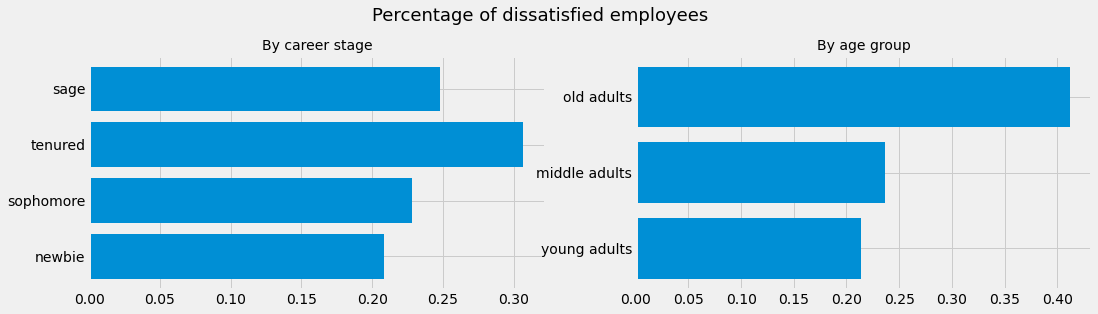

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.barh(count_dissatisfied.index, count_dissatisfied['dissatisfied'])
ax1.set_title('By career stage', fontsize=14)

ax2.barh(count_dissatisfied_age.index, count_dissatisfied_age['dissatisfied'])
ax2.set_title('By age group', fontsize=14)

plt.text(-0.25, 3, 'Percentage of dissatisfied employees', fontsize=18)

# Conclusion

Bar plots give me a clear idea that there is a trend that more older and experienced employees that resign are more often dissatisfied with their job (compare 21% among `newbies` VS 31% among `tenured` or 21% among `young adults` VS 41% among `old adults`). What is interesting, is that in the group of most experienced and loyal employees (`sage`) the level of dissatisfaction is lower than among `tenured` but still relatively high (nearly 25%).

## Further analysis

This work should be regarded as a preliminary recommendation. Next steps could be to identify which positions had the most dissatisfied employees, how is it connected to gender and if which contributing factors correlate to overall dissatisfaction.

## Recommendation to HR department
As far as more experienced employees tend to be most dissatisfied, I would recommend following actions:
- pay attention to company internal culture and open communication
- think about how management can provide more challenges for employees not to feel 'stuck'.